In [18]:
%load_ext autoreload
%autoreload 2

import os
import pathlib
import matplotlib.pyplot as plt
from rydberggpt.data.loading.rydberg_dataset import get_rydberg_dataloader
from rydberggpt.data.loading.utils import read_subfolder_data
notebook_path = os.path.abspath("")
parent_directory = pathlib.Path(notebook_path).parent
data_folder_path = os.path.join(parent_directory, 'data')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading the dataset from the data folder

In [14]:
df, graph_data = read_subfolder_data(data_folder_path)

['.DS_Store', 'delta_4_455 ', 'delta_4_955', 'delta_-1_545 ', 'delta_13_455']


In [15]:
df.head()

,omega,lx,ly,beta,num_atoms,delta,measurement
0,4.24,16,16,1.0,256,4.455,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
1,4.24,16,16,1.0,256,4.455,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
2,4.24,16,16,1.0,256,4.455,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,4.24,16,16,1.0,256,4.455,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,4.24,16,16,1.0,256,4.455,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."


# Load the graph

We can visualize its adjacency matrix.

In [19]:
import networkx as nx
graph_dict = graph_data[0]
graph_nx = nx.node_link_graph(graph_dict)

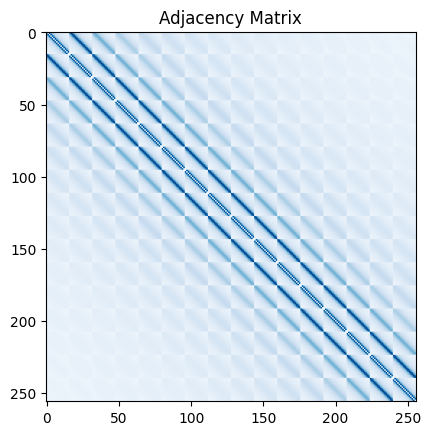

In [20]:
adj_matrix = nx.to_numpy_array(graph_nx)
plt.imshow(adj_matrix, cmap="Blues")
plt.title("Adjacency Matrix")
plt.show()

or plot the graph.

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def plot_graph(graph):
    # Get node positions from the graph
    pos = nx.get_node_attributes(graph, "pos")

    # Extract edge weights for edge coloring
    edges, weights = zip(*nx.get_edge_attributes(graph, "weight").items())

    # Normalize edge weights for better visualization
    normalized_weights = [w / max(weights) for w in weights]

    # Calculate edge widths proportional to normalized weights
    edge_widths = [w * 2 for w in normalized_weights]

    # Create a color map for the edges
    cmap = plt.cm.Blues
    norm = mcolors.Normalize(vmin=min(normalized_weights), vmax=max(normalized_weights))

    # Plot the graph
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(
        graph,
        pos,
        node_color="white",
        with_labels=True,
        font_color="black",
        edge_cmap=cmap,
        node_size=400,
        width=edge_widths,
        alpha=0.5,
        edgecolors="black",
        edgelist=edges,
        edge_color=normalized_weights,
        verticalalignment="center_baseline",
        font_size=12,
    )
    plt.title("Grid Graph", fontsize=18)

    # Add a color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label("1/Distance")

    plt.show()


/var/folders/__/02t666y930jbqg3tbvp6cl6r0000gn/T/ipykernel_4764/2640315739.py:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


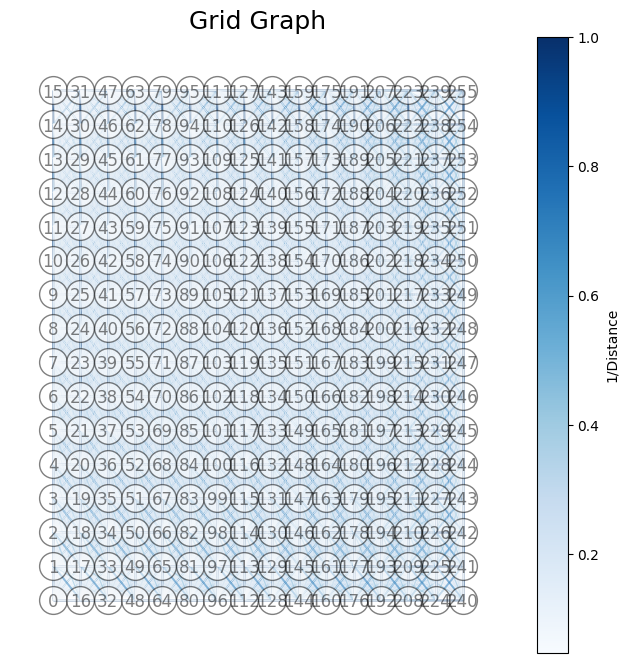

In [23]:
plot_graph(graph_nx)

In [24]:
train_dataloader, _ = get_rydberg_dataloader(data_path=data_folder_path)

['.DS_Store', 'delta_4_455 ', 'delta_4_955', 'delta_-1_545 ', 'delta_13_455']


## The pytorch_dataloader
Each batch contains a datastructure with 6 elements (see rydberggpt.data.dataclasses). 
The first element is a pytorch_geometrich graph object. Each graph has num_atoms nodes and each nodes has a node feature vector containing delta, omega and beta. The second, third and fourth element are delta, omega and beta. Finally we need the measurement data. Here we store the data typically one_hot encoded because this is the format the transformer requires as input. The last element are the shifted measurements. We shift the measurements by one to the left. This is because we want to predict the next measurement given the previous ones.

```python
@dataclass
class Batch:
    graph: Data
    delta: torch.float
    omega: torch.float
    beta: torch.float
    m_onehot: torch.Tensor
    m_shifted_onehot: torch.Tensor
```

In [27]:
for batch in train_dataloader:
    batch 
    break